# TP Redes Neuronales

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as skl
import math
from matplotlib import pyplot as plt, cm

In [2]:
def tanh(xp, w):
    return np.tanh(xp.dot(w))

def add_bias(matrix):
    bias = -np.ones((len(matrix),1))
    return np.concatenate((matrix,bias), axis=1)

def sub_bias(matrix):
    return matrix[:,:-1]

In [3]:
def activation(xh):
    # Se puede pasar como parametro para que no rompa la memoria de la computadora
    y = [np.zeros((1, S[i]+1))[0] for i in range(L-1)] + [np.zeros((1, S[-1]))[0]]
    y_temp = xh
    for k in range(1, L):
        y[k-1] = add_bias(y_temp)
        y_temp = tanh(y[k-1],W[k])
    y[-1] = y_temp
    return y

In [4]:
def correction(y, zh, lr):
    dw = [0] + [np.zeros((S[i-1]+1, S[i])) for i in range(L-1)]
    e = zh - y[-1]
    dy = 1 - y[-1] ** 2
    # Mismo concepto que el Y pero para atras
    # Mismas dimensiones que Y
    d = [np.zeros((1, S[i]+1))[0] for i in range(L-1)] + [np.zeros((1, S[-1]))[0]]
    d[-1] = e * dy
    for k in range(L-1,0,-1):
        dw[k] = lr * (y[k-1].T.dot(d[k]))
        e = d[k].dot(W[k].T)
        dy = 1 - y[k-1] ** 2
        d[k-1] = sub_bias(e * dy)
    return dw

In [5]:
def adaptation(W, dw):
    for k in range(1, L):
        W[k] += dw[k]
    return W

In [6]:
def estimation(zh, yh):
    return np.linalg.norm(zh-yh[-1])**2

In [24]:
def train(xp, W, z, lr, epsilon, max_epoch):
    err = 1
    epoch = 1
    while err > epsilon and epoch < max_epoch:
        err = 0
        for h in range(0, len(xp)):
            yh = activation(xp[h:h+1])
            eh = estimation(z[h:h+1], yh)
            dw = correction(yh, z[h:h+1], lr)
            W = adaptation(W, dw)
            err += np.linalg.norm(eh)
        epoch += 1
        ERROR.append(err)
    return W

In [8]:
files = ['tp1_ej1_training.csv','tp1_ej1_training.csv']
data_path = "../data/"

---
## Ejercicio 1

### Diagnóstico de cáncer de mamas.
#### Este conjunto de datos contiene los resultados de un examen específico que es utilizado en el diagnóstico de cáncer de mamas. Cada entrada corresponde a los datos obtenidos para distintos pacientes y contiene 10 características provenientes de imágenes digitalizadas de muestras de células. Junto con estas características se encuentra también el diagnóstico final, determinado junto con otras pruebas, en  donde se indica si la muestra analizada pertenecía a un tumor maligno o benigno.  La información de cada una de estas características es obtenida en valores reales a partir de algunos atributos como los que se detallan a continuación:

- Diagnóstico (M = maligno, B = benigno)
- Radio (media de la distancia desde el centro a los puntos de perímetro)
- Textura (desviación estándar de los valores en escala de gris)
- Perímetro
- Área
- Suavidad (variaciones locales en la longitud del radio)
- Compacidad (perímetro2/ área - 1)
- Concavidad (severidad de las porciones cóncavas del contorno)
- Puntos cóncavos (proporción de porciones cóncavas del contorno)
- Simetría

In [10]:
data = pd.read_csv(data_path+files[0], header=None)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,M,11.779,29.321,93.649,1300.312,2.469,1.071,4.459,6.299,0.586,1.506
1,B,18.631,16.772,126.232,657.973,1.659,1.230,4.179,5.549,0.678,1.734
2,B,11.221,29.886,120.610,1302.758,2.519,2.485,5.281,6.633,0.748,1.999
3,M,14.418,29.200,101.041,1384.419,2.519,1.545,3.802,4.359,0.527,1.778
4,B,20.089,27.558,99.301,917.233,2.107,1.986,2.447,1.845,0.693,1.499


### Pre-processing
#### Normalizing values for each column in the range (-1,1)

In [12]:
for c in data.columns[1:]:
    data[c] = skl.minmax_scale(data[c], feature_range=(-1, 1))

In [13]:
data['result'] = data.apply(lambda x: -1 if x[0] == 'M' else 1, axis=1)

In [14]:
x = data[list(range(1,11))].to_numpy()
z = np.array(data.result.tolist())

In [34]:
learning_rate = 10e-3
epsilon = 0.0001
max_epoch = 1000

In [36]:
ERROR = []
P = len(x) # 
S = [10,10,1]
# S = [10,20,30,40,30,20,10,7,5,3,2,1] # Variar con entrada 2,3,4,5 y 6
L = len(S) # Cantidad de capas
W = [0] + [np.random.normal(0, S[0]**(0.5), (S[i-1]+1, S[i])) for i in range(1, L)] # len(W) = L

In [37]:
W = train(x, W, z, learning_rate, epsilon, max_epoch)
pass

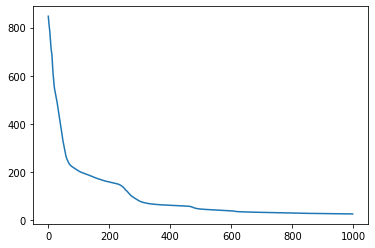

In [38]:
plt.plot(ERROR)

In [151]:
len(z.tolist())
# len(activation(x)[-1].reshape(1,P)[0].tolist())

410

In [42]:
ERROR[-1]

24.87633061233751

In [41]:
activation(x)[-1]

array([[-0.99981001],
       [ 0.94149948],
       [ 0.9922906 ],
       [-0.99828213],
       [ 1.        ],
       [ 0.99849006],
       [ 0.99999999],
       [-0.99999735],
       [-0.99529045],
       [ 0.36861969],
       [ 0.94875915],
       [ 0.9999976 ],
       [ 0.99984305],
       [-0.99999785],
       [-0.98300193],
       [-0.99947828],
       [ 0.99998946],
       [ 0.99872542],
       [-0.99984149],
       [ 0.99999992],
       [-0.99801614],
       [ 0.99999838],
       [-0.98971943],
       [-1.        ],
       [-0.83184888],
       [ 0.82779805],
       [ 0.9849459 ],
       [-0.8616263 ],
       [ 0.99971856],
       [-0.89433612],
       [-0.99992892],
       [ 0.99998695],
       [-0.99999694],
       [ 0.97860049],
       [-0.88626712],
       [-0.99999814],
       [ 0.9997833 ],
       [-1.        ],
       [-0.97158605],
       [ 0.99985232],
       [-0.99999984],
       [-0.89409516],
       [-0.87976389],
       [ 0.99946834],
       [-0.70541026],
       [ 0